In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 1. EDA 

In [2]:
data = pd.read_csv('regression_data.csv',index_col=None, names= ['id', 'date', 'bedrooms','bathroom','sqft_living', 'sqft_lot','floors', 'waterfront','view', 'condition','grade','sqft_above','sqft_basement', 'yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','price'])
data.head()

,id,date,bedrooms,bathroom,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [3]:
data['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [4]:
data['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2007       35
        ...  
1948        1
1954        1
1951        1
1944        1
1959        1
Name: yr_renovated, Length: 70, dtype: int64

* Note: lots of unique values, also 0 for not renovated houses --> new column with bins 

In [5]:
data.dtypes

id                 int64
date              object
bedrooms           int64
bathroom         float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

* change the date in datetime format - do we need the selling date?

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathroom       21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

* we do not have null values

In [7]:
dup_check= data.duplicated(subset=None, keep='first')

In [8]:
len(dup_check)

21597

In [9]:
dup_check.unique()

array([False])

* There aren't any duplicates in the dataframe

In [10]:
data.describe()

,id,bedrooms,bathroom,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


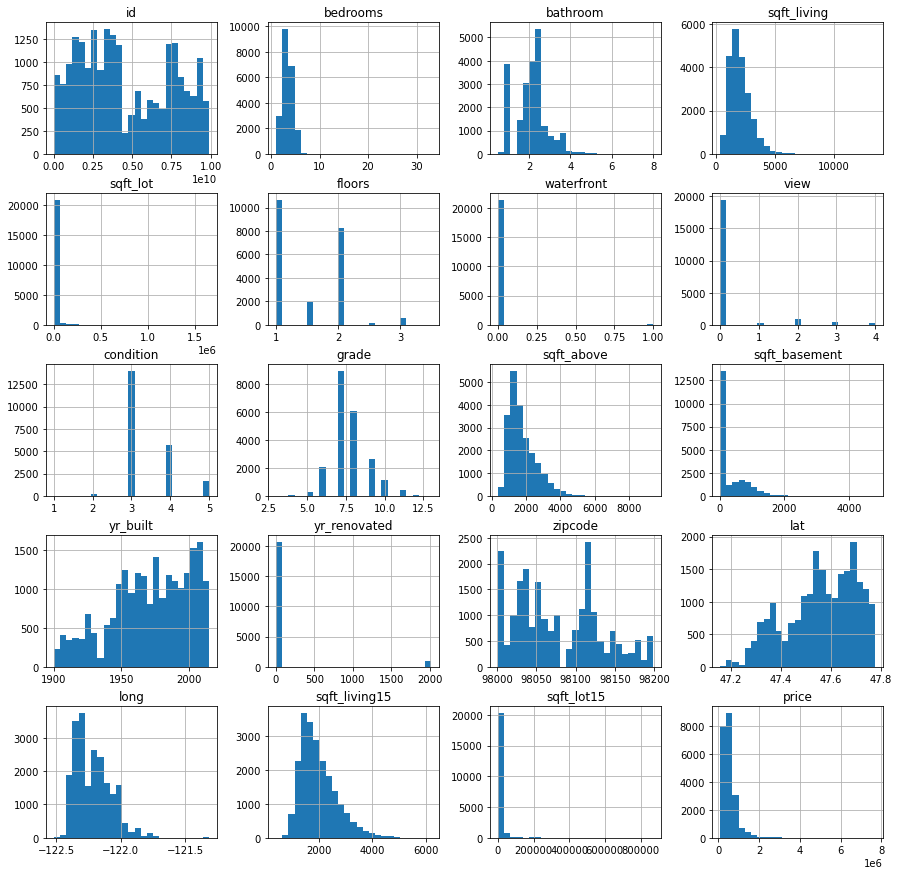

In [11]:
data.hist(bins=25,figsize=(15, 15), layout=(5, 4));
plt.show()

<AxesSubplot:>

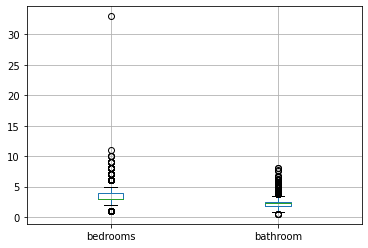

In [12]:
data.boxplot(column=['bedrooms', 'bathroom'])

* bedrooms - remove outlier

<AxesSubplot:>

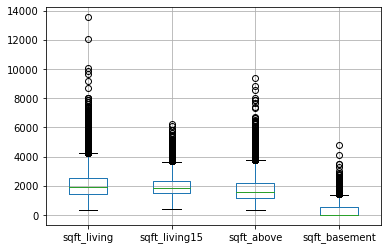

In [13]:
data.boxplot(column=['sqft_living','sqft_living15', 'sqft_above', 'sqft_basement',])

<AxesSubplot:>

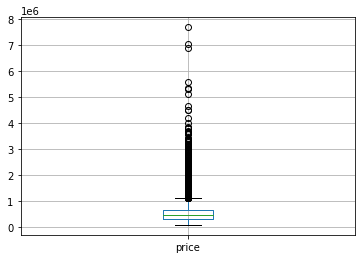

In [14]:
data.boxplot(column=['price'])

In [15]:
data['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [16]:
data['condition'].unique()

array([3, 5, 4, 1, 2])

In [17]:
data['waterfront'].unique()

array([0, 1])

In [18]:
data['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [19]:
data['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33])

In [20]:
data['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

* need to look in to the 33 bedroom house data

In [21]:
data['bathroom'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

* create bins for amount of bathrooms

### Create heatmap to check for too high correlations

<AxesSubplot:>

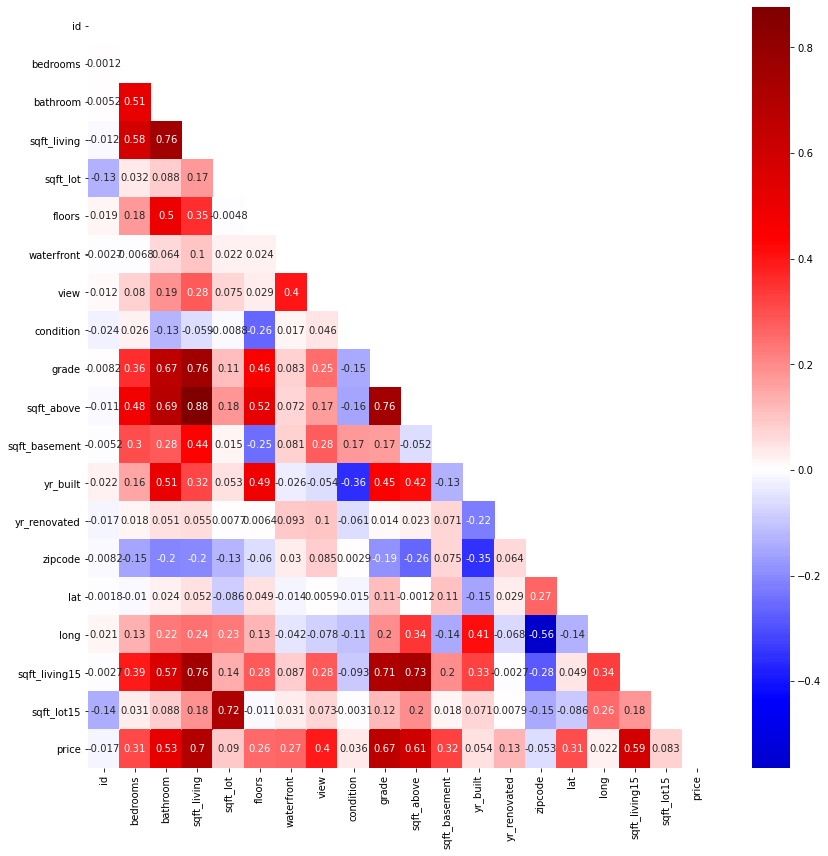

In [22]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(14,14))
mask=np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr,
            cmap='seismic',
            mask=mask,
            center=0,
            annot=True,
            ax=ax)

* Note: have to drop some of the sqft variables, because they are correlated. 88% sqft_above and sqft_living

# 2. Cleaning steps

#### Date is classified as an object type. Converting it to date.

In [23]:
cleandata=data

In [24]:
cleandata['date']= pd.to_datetime(data['date'], format='%m/%d/%y', errors='coerce')

# 3. Feature extraction & Pre- processing

NOTES FROM EDA:
* yr_renovated: lots of unique values, also 0 for not renovated houses --> new column: renovated after 1990 True or False or bins
* sqft basement, sqft above, sqftlot15, price, bedrooms - remove outliers
* create bins for amount of bathrooms, year of construction, renovations 
* drop zipcode after introducing column area which grades the area 
* drop lat, long
* have to drop some of the sqft variables, because they are correlated.

#### Bedrooms contains a property with 33 bedrooms. Removing this outlier.

In [25]:
data.loc[data['bedrooms'] == 33]

,id,date,bedrooms,bathroom,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [26]:
cleandata = cleandata.drop(15856)

### Droping latitude, longitude column ----what about sqft_columnS????

In [27]:
cleandata.drop(['lat', 'long', 'sqft_living', 'sqft_lot', 'date'], axis=1, inplace=True)

In [28]:
cleandata.head(10)

,id,bedrooms,bathroom,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,6414100192,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,5631500400,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2487200875,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,1954400510,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
5,7237550310,4,4.50,1.0,0,0,3,11,3890,1530,2001,0,98053,4760,101930,1230000
6,1321400060,3,2.25,2.0,0,0,3,7,1715,0,1995,0,98003,2238,6819,257500
7,2008000270,3,1.50,1.0,0,0,3,7,1060,0,1963,0,98198,1650,9711,291850
8,2414600126,3,1.00,1.0,0,0,3,7,1050,730,1960,0,98146,1780,8113,229500
9,3793500160,3,2.50,2.0,0,0,3,7,1890,0,2003,0,98038,2390,7570,323000


In [29]:
cleandata.dtypes

id                 int64
bedrooms           int64
bathroom         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

### Creating bins for bathroom, yr_renovated, bedrooms, yr_built

In [30]:
#putting years of renovations into bins
bins = [0,1940,1970,1990,2015]
cleandata['renovation_bins'] = pd.cut(cleandata.yr_renovated, bins=[0,1940,1970,1990,2015], include_lowest=True, right=True)
cleandata['renovated'] = pd.cut(cleandata.yr_renovated, bins=[0,1940,1970,1990,2015], include_lowest=True, right=True, labels=[0,1,2,3])

In [31]:
cleandata.drop(['renovation_bins', 'yr_renovated'], axis=1, inplace=True)

In [32]:
cleandata.renovated = cleandata.renovated.astype('str')

In [33]:
cleandata['built'] = pd.qcut(cleandata['yr_built'], q=20, precision=0)

In [34]:
bins = [1900,1960,1970,1990,2000,2015]
cleandata['built_bins'] = pd.cut(cleandata.yr_built, bins=[1900,1960,1970,1990,2000,2015], include_lowest=True, right=True)
cleandata['built'] = pd.cut(cleandata.yr_built, bins=[1900,1960,1970,1990,2000,2015], include_lowest=True, right=True, labels=['1960','1970','1990','2000','2015'])

In [35]:
cleandata.drop(['yr_built', 'built_bins'], axis=1, inplace=True)

In [36]:
cleandata.built = cleandata.built.astype('str')

In [37]:
#bins=[0,2,3,4,8]
#cleandata['bathroom_bin'] = pd.cut(cleandata.bathroom, bins,  include_lowest=True, right=True)
#cleandata['bathroom_bins'] = pd.cut(cleandata.bathroom, bins, include_lowest=True, right=True, labels=['2','3','4','8'])

In [38]:
#cleandata.drop(['bathroom_bin', 'bathroom'], axis=1, inplace=True)

In [39]:
#cleandata.bathroom_bins = cleandata.bathroom_bins.astype('str')

In [40]:
cleandata['view'] = cleandata['view'].astype('str')

In [41]:
cleandata['floors'] = cleandata['floors'].astype('str')

In [42]:
cleandata['waterfront'] = cleandata['waterfront'].astype('str')

In [43]:
cleandata['condition'] = cleandata['condition'].astype('str')

In [44]:
cleandata['grade'] = cleandata['grade'].astype('str')

In [45]:
cleandata['bedrooms'] = cleandata['bedrooms'].astype('str')

In [46]:
cleandata['bathroom'] = cleandata['bathroom'].astype('str')

In [47]:
cleandata.dtypes

id                int64
bedrooms         object
bathroom         object
floors           object
waterfront       object
view             object
condition        object
grade            object
sqft_above        int64
sqft_basement     int64
zipcode           int64
sqft_living15     int64
sqft_lot15        int64
price             int64
renovated        object
built            object
dtype: object

### Introducing column area which grades the area and drop zipcode afterwards

In [48]:
cleandata['area'] = cleandata['zipcode']

In [49]:
area_1 = [98001,98002,98003,98010,98011,98019,98022,98023,98027,98028,98038,98045,98072,98077,98092,98155,98166]

In [50]:
area_2 = [98014,98024,98029,98030,98031,98032,98042,98053,98055,98056,98058,98059,98065,98070,98146,98148,98168,98178,98188,98198]

In [51]:
area_3 = [98052,98074,98075,98106,98108,98116,98118,98125,98126,98133,98136,98177]

In [52]:
area_4 = [98004,98005,98006,98007,98008,98033,98034,98039,98040,98102,98103,98105,98107,98109,98112,98115,98117,98119,98122,98144,98199]

In [53]:
cleandata.loc[cleandata['area'].isin(area_1), 'area'] = 1
cleandata.loc[cleandata['area'].isin(area_2), 'area'] = 2
cleandata.loc[cleandata['area'].isin(area_3), 'area'] = 3
cleandata.loc[cleandata['area'].isin(area_4), 'area'] = 4

In [54]:
cleandata['area'].unique()

array([2, 3, 1, 4])

In [55]:
cleandata['area'].value_counts()

4    6564
2    5443
1    5083
3    4506
Name: area, dtype: int64

In [56]:
cleandata.drop(['zipcode'], axis=1, inplace=True)

In [57]:
cleandata.drop(['id'], axis=1, inplace=True)

In [58]:
cleandata['area'] = cleandata['area'].astype('str')

In [59]:
cleandata.head()

,bedrooms,bathroom,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price,renovated,built,area
0,3,1.0,1.0,0,0,3,7,1180,0,1340,5650,221900,0,1960,2
1,3,2.25,2.0,0,0,3,7,2170,400,1690,7639,538000,3,1960,3
2,2,1.0,1.0,0,0,3,6,770,0,2720,8062,180000,0,1960,1
3,4,3.0,1.0,0,0,5,7,1050,910,1360,5000,604000,0,1970,3
4,3,2.0,1.0,0,0,3,8,1680,0,1800,7503,510000,0,1990,3


In [60]:
cleandata.dtypes

bedrooms         object
bathroom         object
floors           object
waterfront       object
view             object
condition        object
grade            object
sqft_above        int64
sqft_basement     int64
sqft_living15     int64
sqft_lot15        int64
price             int64
renovated        object
built            object
area             object
dtype: object

### Train and test set

In [61]:
# first, split X-y (learning-target data)
X = cleandata.drop(columns=['price'])
y = cleandata['price']

In [62]:
# checking shape
print(X.shape)
print(y.shape)

(21596, 14)
(21596,)


In [63]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

# train-test-split (4 sets)
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.7, random_state=42)  # random state fixed sample

### First Iteration Modelling

In [64]:
# dropping bathroom_ just to check.... as the hyphen is causing issues
#cleandata.drop(['bathroom'], axis=1, inplace=True)

In [65]:
from sklearn.linear_model import LinearRegression as LinReg

# create an (untrained) model "instance"
linreg=LinReg()    

# train the model
linreg.fit(X_train, y_train)

# predict target data from test features , that the model has never seen
y_pred_linreg=linreg.predict(X_test)


### Model Validation

In [66]:
models=[linreg,
        # add more models here
       ]
model_names=['linreg',
             # add more model strings here
            ]
preds=[y_pred_linreg,
       # add more predicted labels here
      ]

In [67]:
# this for loop is actually not necessary when only 1 model is used.
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.7315635451676319 -- test R2: 0.7224085926900964


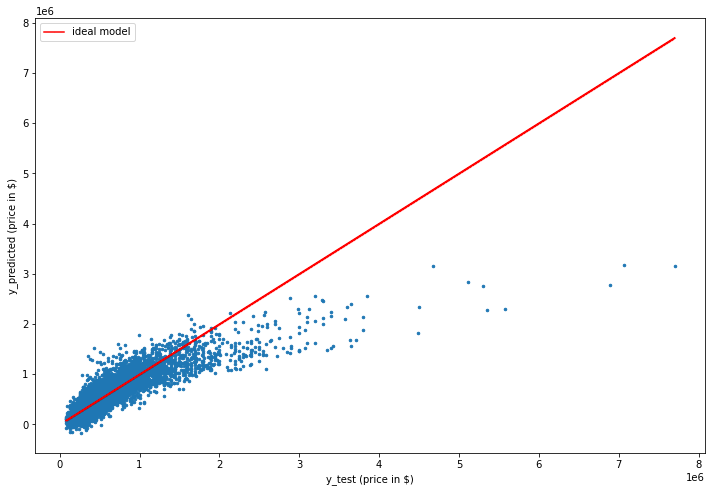

In [68]:
# generating value pairs for an ideal model
# which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(y_test, y_pred_linreg, ms=5, marker=".", ls='')

# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')

# show legend
plt.legend();

plt.xlabel('y_test (price in $)');
plt.ylabel('y_predicted (price in $)');

## Optimizing the model

### Logarithmic transformation 

sqft_above, sqft_basement, sqft_living15, sqft_lot15, price

#### sqft_above

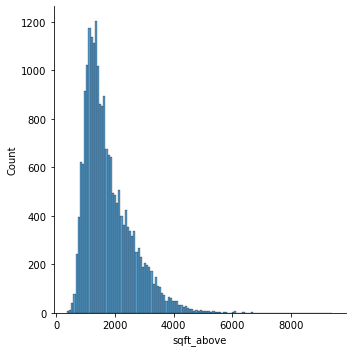

In [69]:
sns.displot(cleandata['sqft_above'])
plt.show()

In [70]:
def log_transform_clean(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return 0

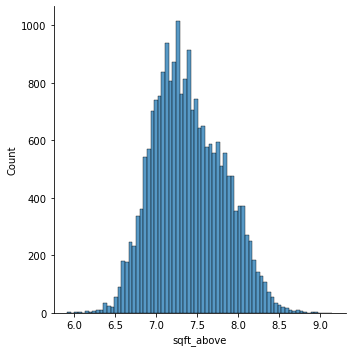

In [71]:
temp = cleandata['sqft_above'].apply(log_transform_clean)
sns.displot(temp)
plt.show()

In [72]:
import statsmodels.api as sm
from scipy.stats import norm
import pylab

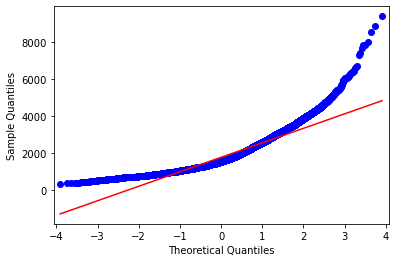

In [73]:
# before
sm.qqplot(cleandata['sqft_above'], line='r')
pylab.show()

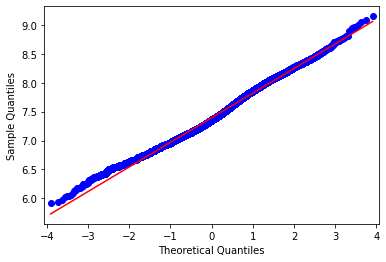

In [74]:
# after
sm.qqplot(temp, line='r')
pylab.show()

In [75]:
cleandata['sqft_above']= temp

#### sqft_basement

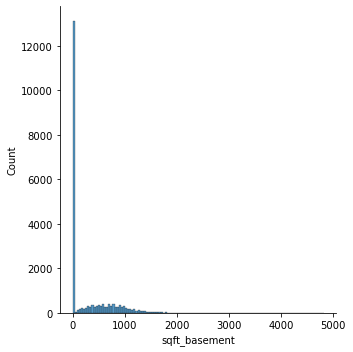

In [76]:
sns.displot(cleandata['sqft_basement'])
plt.show()

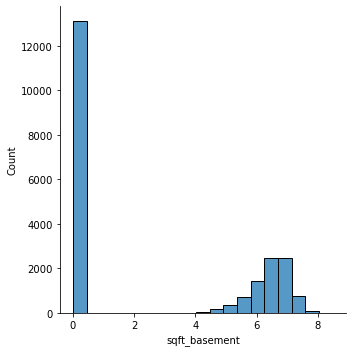

In [77]:
temp2 = cleandata['sqft_basement'].apply(log_transform_clean)
sns.displot(temp2)
plt.show()

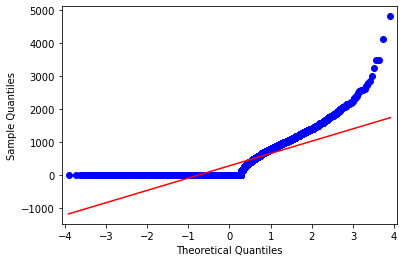

In [78]:
# before
sm.qqplot(cleandata['sqft_basement'], line='r')
pylab.show()

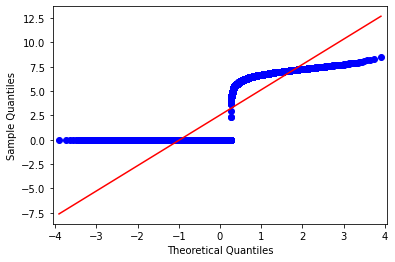

In [79]:
# after
sm.qqplot(temp2, line='r')
pylab.show()

* not a goot fit, basement 1 no basement 0 would be an idea

In [80]:
#lets drop basement
cleandata.drop(['sqft_basement'], axis=1, inplace=True)

#### sqft_living15

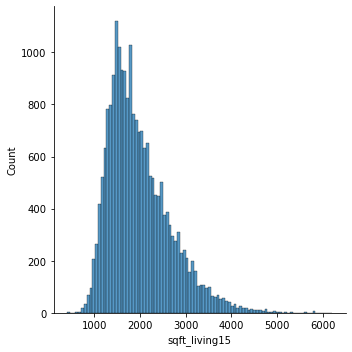

In [81]:
sns.displot(cleandata['sqft_living15'])
plt.show()

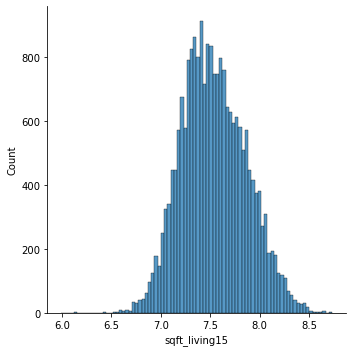

In [82]:
temp3 = cleandata['sqft_living15'].apply(log_transform_clean)
sns.displot(temp3)
plt.show()

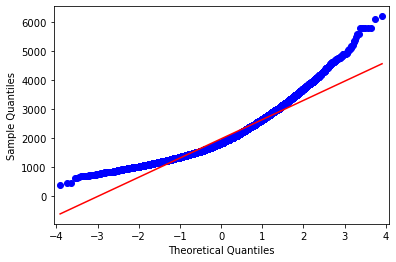

In [83]:
# before
sm.qqplot(cleandata['sqft_living15'], line='r')
pylab.show()

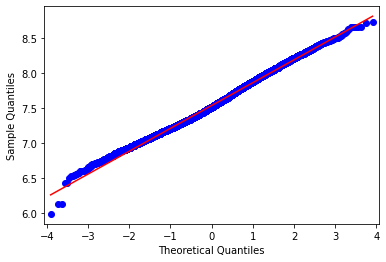

In [84]:
# after
sm.qqplot(temp3, line='r')
pylab.show()

In [85]:
cleandata['sqft_living15']= temp3

### sqft_lot15

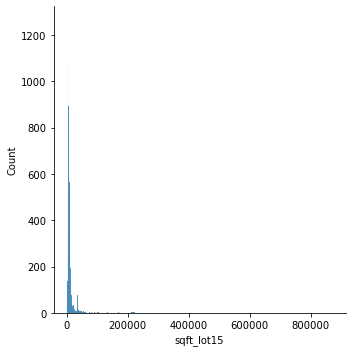

In [86]:
sns.displot(cleandata['sqft_lot15'])
plt.show()

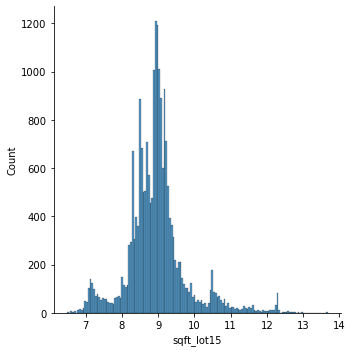

In [87]:
temp4 = cleandata['sqft_lot15'].apply(log_transform_clean)
sns.displot(temp4)
plt.show()

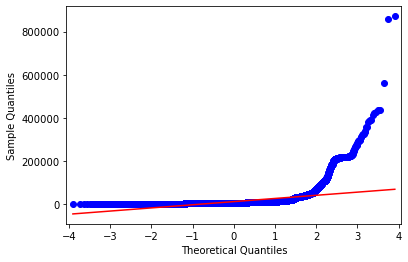

In [88]:
# before
sm.qqplot(cleandata['sqft_lot15'], line='r')
pylab.show()

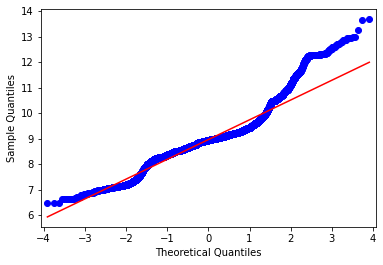

In [89]:
# after
sm.qqplot(temp4, line='r')
pylab.show()

* not optimal in the last quantile, but better than before

In [90]:
cleandata['sqft_lot15']= temp4

In [96]:
cat_cols=[col for col in cleandata.columns if (cleandata[col].dtype==object)] 
num_cols=[col for col in cleandata.columns if (cleandata[col].dtype!=object)]

In [97]:
num_cols.remove('price')

### Normalize & standardize

In [98]:
from sklearn.preprocessing import MinMaxScaler
cleandata['sqft_above']=MinMaxScaler().fit_transform(cleandata['sqft_above'].values.reshape(-1, 1))

In [99]:
cleandata['sqft_living15']=MinMaxScaler().fit_transform(cleandata['sqft_living15'].values.reshape(-1, 1))

In [100]:
cleandata['sqft_lot15']=MinMaxScaler().fit_transform(cleandata['sqft_lot15'].values.reshape(-1, 1))

In [101]:
from sklearn.preprocessing import StandardScaler
num_cols

['sqft_above', 'sqft_living15', 'sqft_lot15']

In [102]:
for c in num_cols[:-1]:   # we'll normalize all except the target column
    cleandata[c]=StandardScaler().fit_transform(cleandata[c].values.reshape(-1, 1))

## Second Iteration Modell

In [103]:
# first, split X-y (learning-target data)
X = cleandata.drop(columns=['price'])
y = cleandata['price']

In [104]:
# checking shape
print(X.shape)
print(y.shape)

(21596, 13)
(21596,)


In [105]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

# train-test-split (4 sets)
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.7, random_state=42)  # random state fixed sample

In [106]:
from sklearn.linear_model import LinearRegression as LinReg

# create an (untrained) model "instance"
linreg=LinReg()    

# train the model
linreg.fit(X_train, y_train)

# predict target data from test features , that the model has never seen
y_pred_linreg=linreg.predict(X_test)

In [107]:
models=[linreg,
        # add more models here
       ]
model_names=['linreg',
             # add more model strings here
            ]
preds=[y_pred_linreg,
       # add more predicted labels here
      ]

In [108]:
# this for loop is actually not necessary when only 1 model is used.
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.6972306390407688 -- test R2: 0.6759032447104818


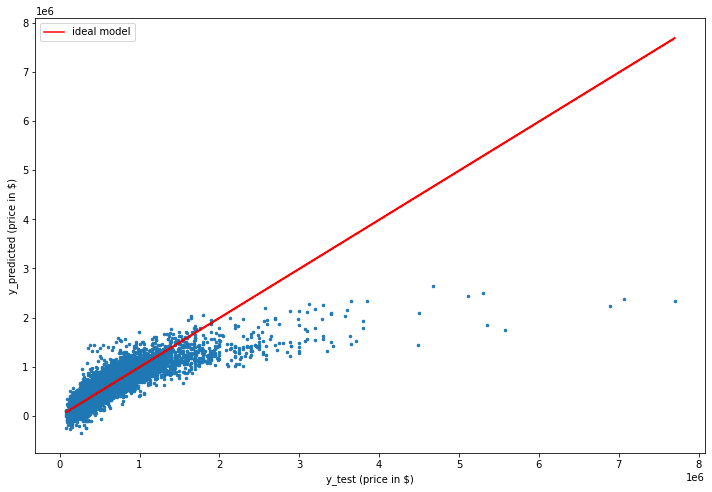

In [109]:
# generating value pairs for an ideal model
# which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(y_test, y_pred_linreg, ms=5, marker=".", ls='')

# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')

# show legend
plt.legend();

plt.xlabel('y_test (price in $)');
plt.ylabel('y_predicted (price in $)');

In [110]:
cleandata.head()

,bedrooms,bathroom,floors,waterfront,view,condition,grade,sqft_above,sqft_living15,sqft_lot15,price,renovated,built,area
0,3,1.0,1.0,0,0,3,7,-0.753633,-1.035505,0.300162,221900,0,1960,2
1,3,2.25,2.0,0,0,3,7,0.672662,-0.326839,0.342058,538000,3,1960,3
2,2,1.0,1.0,0,0,3,6,-1.753047,1.126485,0.349544,180000,0,1960,1
3,4,3.0,1.0,0,0,5,7,-1.026909,-0.990262,0.283185,604000,0,1970,3
4,3,2.0,1.0,0,0,3,8,0.073468,-0.134270,0.339562,510000,0,1990,3


#### Encoding categorical columns

 bedrooms, bathroom, floors, waterfront, view, condition, grade, renovation_bin_labels, yr_build, area

In [111]:
cleandata.dtypes

bedrooms          object
bathroom          object
floors            object
waterfront        object
view              object
condition         object
grade             object
sqft_above       float64
sqft_living15    float64
sqft_lot15       float64
price              int64
renovated         object
built             object
area              object
dtype: object

In [112]:
#cat_cols=[col for col in cleandata.columns if (cleandata[col].dtype==object)] 
#num_cols=[col for col in cleandata.columns if (cleandata[col].dtype!=object)]

In [113]:
one_hot_data=pd.get_dummies(cleandata[cat_cols], drop_first=True)   # one hot encoding categorical variables

one_hot_data.head()

,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,...,renovated_1,renovated_2,renovated_3,built_1970,built_1990,built_2000,built_2015,area_2,area_3,area_4
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [114]:
hotdata =pd.concat([cleandata[num_cols], one_hot_data], axis=1)   # concat dataframes
hotdata.head()

,sqft_above,sqft_living15,sqft_lot15,bedrooms_10,bedrooms_11,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,...,renovated_1,renovated_2,renovated_3,built_1970,built_1990,built_2000,built_2015,area_2,area_3,area_4
0,-0.753633,-1.035505,0.300162,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.672662,-0.326839,0.342058,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,-1.753047,1.126485,0.349544,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.026909,-0.990262,0.283185,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0.073468,-0.134270,0.339562,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [115]:
# first, split X-y (learning-target data)
X = hotdata
y = cleandata['price']

In [116]:
# checking shape
print(X.shape)
print(y.shape)

(21596, 75)
(21596,)


## Third Iteration

In [117]:
# train_test_split
from sklearn.model_selection import train_test_split as tts

# train-test-split (4 sets)
X_train, X_test, y_train, y_test=tts(X, y, test_size=0.2, random_state=42)  # random state fixed sample

In [118]:
from sklearn.linear_model import LinearRegression as LinReg

# create an (untrained) model "instance"
linreg=LinReg()    

# train the model
linreg.fit(X_train, y_train)

# predict target data from test features , that the model has never seen
y_pred_linreg=linreg.predict(X_test)


In [119]:
models=[linreg,
        # add more models here
       ]
model_names=['linreg',
             # add more model strings here
            ]
preds=[y_pred_linreg,
       # add more predicted labels here
      ]

In [120]:
# this for loop is actually not necessary when only 1 model is used.
for i in range(len(models)):

    train_score=models[i].score(X_train, y_train) #R2
    test_score=models[i].score(X_test, y_test)

    print ('Model: {}, train R2: {} -- test R2: {}'.format(model_names[i], train_score, test_score))

Model: linreg, train R2: 0.7755370008945633 -- test R2: 0.732456679299226


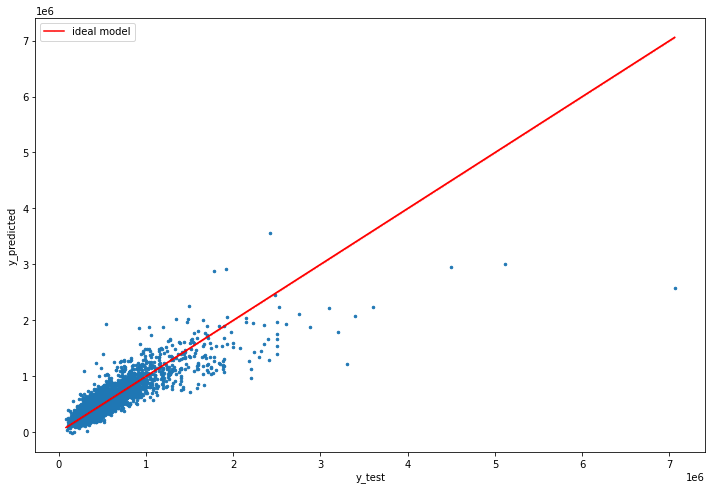

In [121]:
# generating value pairs for an ideal model
# which predicts the exact same y-value for a given test-y-value
line_x = line_y = np.linspace(min(y_test), max(y_test), num=len(y_test))

fig, ax = plt.subplots(figsize=(12,8))
plt.plot(y_test, y_pred_linreg, ms=5, marker=".", ls='')

# plot the ideal model together with our dots
plt.plot(line_x, line_y, ms=0.1, marker=".", ls='-', c='r', label='ideal model')

# show legend
plt.legend();

plt.xlabel('y_test');
plt.ylabel('y_predicted');


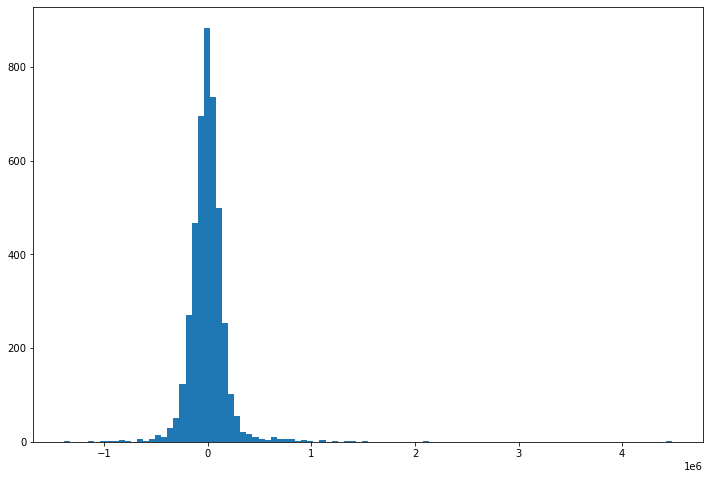

In [122]:
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(y_test-y_pred_linreg, bins = 100);

In [123]:
from sklearn.metrics import mean_squared_error as mse

for i in range(len(models)):

    train_mse=mse(models[i].predict(X_train), y_train) #MSE
    test_mse=mse(preds[i], y_test)

    print ('Model: {}, train MSE: {} -- test MSE: {}'.format(model_names[i], train_mse, test_mse))

Model: linreg, train MSE: 30513822595.254704 -- test MSE: 35051656350.46798


In [124]:
for i in range(len(models)):

    train_rmse=mse(models[i].predict(X_train), y_train)**0.5 #RMSE
    test_rmse=mse(preds[i], y_test)**0.5

    print ('Model: {}, train RMSE: {} -- test RMSE: {}'.format(model_names[i], train_rmse, test_rmse))

Model: linreg, train RMSE: 174682.06145810938 -- test RMSE: 187220.87584045745


In [125]:
from sklearn.metrics import mean_absolute_error as mae
for i in range(len(models)):
    train_mae=mae(models[i].predict(X_train), y_train) #MAE
    test_mae=mae(preds[i], y_test)

    print ('Model: {}, train MAE: {} -- test MAE: {}'.format(model_names[i], train_mae, test_mae))

Model: linreg, train MAE: 112022.88338452287 -- test MAE: 113325.05564077166


# Outlook

#### A next step to improve the model: Dealing with outliers

In [127]:
# e.g. 3*IQR in a column
q1=np.percentile(cleandata['sqft_lot15'], 25)   # percentile 25
q3=np.percentile(cleandata['sqft_lot15'], 75)   # percentile 75

iqr=q3-q1  # IQR

upper=q3+3*iqr   # upper boundary
lower=q1-3*iqr   # lower boundary

In [128]:
# how many rows would be outliers in that sense (below the threshold)?
len(cleandata[cleandata['sqft_lot15'] < lower])

2

In [129]:
# how many rows would be outliers in that sense (above the threshold)?
len(cleandata[cleandata['sqft_lot15'] > upper])

440